# ML coding assigment 21-22

## Goal
The goal of the assigment is to predict the symboling value of the car. The symboling value of a car is a discrete number ranging from -3 tot 3.

The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Automobile).
 
In order to do so the data data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

This is a multiclass classification task. There is certainly ordinality in the categorical target classes so it might be an option to convert this first to a numerical variable and see it as a regression task. We have however not really an idea how big the distance between two categories is so using just the number might introduce bias. For this reason, we choose to treat it as a multi class classification task.

## Import libraries, load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef, cohen_kappa_score
from scipy.stats import pearsonr

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler,PowerTransformer, QuantileTransformer
import category_encoders as ce
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

import re
import os

In [2]:
%matplotlib inline
#use plotly for more interactive graphs
pd.options.plotting.backend = 'plotly'

In [3]:
#load dataset
missing_values =['?']
column_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
categorical_column_names = np.array(['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','fuel-system'])

df = pd.read_csv('./imports-85.data', header=0, names=column_names, na_values=missing_values)
df.shape
print(f'We have a dataset with {df.shape[0]} samples and {df.shape[1]} columns')
df.head(10)

We have a dataset with 204 samples and 26 columns


symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          1                NaN  alfa-romero       gas        std   
2          2              164.0         audi       gas        std   
3          2              164.0         audi       gas        std   
4          2                NaN         audi       gas        std   
5          1              158.0         audi       gas        std   
6          1                NaN         audi       gas        std   
7          1              158.0         audi       gas      turbo   
8          0                NaN         audi       gas      turbo   
9          2              192.0          bmw       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two    hatchback          rwd           front        94.5  ...   
2         four        sedan          fwd           front        99.8  ...   
3         four        sedan          4wd           front        99.4  ...   
4          two        sedan          fwd           front        99.8  ...   
5         four        sedan          fwd           front       105.8  ...   
6         four        wagon          fwd           front       105.8  ...   
7         four        sedan          fwd           front       105.8  ...   
8          two    hatchback          4wd           front        99.5  ...   
9          two        sedan          rwd           front       101.2  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          152         mpfi  2.68    3.47               9.0      154.0   
2          109         mpfi  3.19    3.40              10.0      102.0   
3          136         mpfi  3.19    3.40               8.0      115.0   
4          136         mpfi  3.19    3.40               8.5      110.0   
5          136         mpfi  3.19    3.40               8.5      110.0   
6          136         mpfi  3.19    3.40               8.5      110.0   
7          131         mpfi  3.13    3.40               8.3      140.0   
8          131         mpfi  3.13    3.40               7.0      160.0   
9          108         mpfi  3.50    2.80               8.8      101.0   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  16500.0  
1    5000.0       19           26  16500.0  
2    5500.0       24           30  13950.0  
3    5500.0       18           22  17450.0  
4    5500.0       19           25  15250.0  
5    5500.0       19           25  17710.0  
6    5500.0       19           25  18920.0  
7    5500.0       17           20  23875.0  
8    5500.0       16           22      NaN  
9    5800.0       23           29  16430.0  

[10 rows x 26 columns]

We can already see that the dataset is very small and has some missing values.
## 1. Data preparation and preliminary analysis
### 1.1 Data cleaning

In [4]:
isna = df.isna().sum()
isna[isna > 0]

normalized-losses    40
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

Some off the features only have a few missing values. We'll see for each of them what might be reasonable imputed values. For normalized loss we are missing about 20% of the values.
Let's check the missing values.

In [5]:
#function to have the dataframe without normalized losses
def df_noloss():
     return df.drop(labels='normalized-losses', axis=1)

df_noloss().isna().sum(axis=1)
df_noloss()[df_noloss().isna().sum(axis=1) > 0]

symboling     make fuel-type aspiration num-of-doors body-style  \
8            0     audi       gas      turbo          two  hatchback   
26           1    dodge       gas      turbo          NaN      sedan   
43           1    isuzu       gas        std          two      sedan   
44           0    isuzu       gas        std         four      sedan   
54           3    mazda       gas        std          two  hatchback   
55           3    mazda       gas        std          two  hatchback   
56           3    mazda       gas        std          two  hatchback   
57           3    mazda       gas        std          two  hatchback   
62           0    mazda    diesel        std          NaN      sedan   
128          1  porsche       gas        std          two  hatchback   
129          0  renault       gas        std         four      wagon   
130          2  renault       gas        std          two  hatchback   

    drive-wheels engine-location  wheel-base  length  ...  engine-size  \
8            4wd           front        99.5   178.2  ...          131   
26           fwd           front        93.7   157.3  ...           98   
43           fwd           front        94.5   155.9  ...           90   
44           fwd           front        94.5   155.9  ...           90   
54           rwd           front        95.3   169.0  ...           70   
55           rwd           front        95.3   169.0  ...           70   
56           rwd           front        95.3   169.0  ...           70   
57           rwd           front        95.3   169.0  ...           80   
62           fwd           front        98.8   177.8  ...          122   
128          rwd           front        98.4   175.7  ...          203   
129          fwd           front        96.1   181.5  ...          132   
130          fwd           front        96.1   176.8  ...          132   

     fuel-system  bore stroke compression-ratio  horsepower peak-rpm  \
8           mpfi  3.13   3.40               7.0       160.0   5500.0   
26          mpfi  3.03   3.39               7.6       102.0   5500.0   
43          2bbl  3.03   3.11               9.6        70.0   5400.0   
44          2bbl  3.03   3.11               9.6        70.0   5400.0   
54          4bbl   NaN    NaN               9.4       101.0   6000.0   
55          4bbl   NaN    NaN               9.4       101.0   6000.0   
56          4bbl   NaN    NaN               9.4       101.0   6000.0   
57          mpfi   NaN    NaN               9.4       135.0   6000.0   
62           idi  3.39   3.39              22.7        64.0   4650.0   
128         mpfi  3.94   3.11              10.0       288.0   5750.0   
129         mpfi  3.46   3.90               8.7         NaN      NaN   
130         mpfi  3.46   3.90               8.7         NaN      NaN   

     city-mpg  highway-mpg    price  
8          16           22      NaN  
26         24           30   8558.0  
43         38           43      NaN  
44         38           43      NaN  
54         17           23  10945.0  
55         17           23  11845.0  
56         17           23  13645.0  
57         16           23  15645.0  
62         36           42  10795.0  
128        17           28      NaN  
129        23           31   9295.0  
130        23           31   9895.0  

[12 rows x 25 columns]

In [6]:
df[df['normalized-losses'].isna()]

symboling  normalized-losses           make fuel-type aspiration  \
0            3                NaN    alfa-romero       gas        std   
1            1                NaN    alfa-romero       gas        std   
4            2                NaN           audi       gas        std   
6            1                NaN           audi       gas        std   
8            0                NaN           audi       gas      turbo   
13           1                NaN            bmw       gas        std   
14           0                NaN            bmw       gas        std   
15           0                NaN            bmw       gas        std   
16           0                NaN            bmw       gas        std   
42           0                NaN          isuzu       gas        std   
43           1                NaN          isuzu       gas        std   
44           0                NaN          isuzu       gas        std   
45           2                NaN          isuzu       gas        std   
47           0                NaN         jaguar       gas        std   
48           0                NaN         jaguar       gas        std   
62           0                NaN          mazda    diesel        std   
65           0                NaN          mazda    diesel        std   
70          -1                NaN  mercedes-benz       gas        std   
72           0                NaN  mercedes-benz       gas        std   
73           1                NaN  mercedes-benz       gas        std   
74           1                NaN        mercury       gas      turbo   
81           3                NaN     mitsubishi       gas      turbo   
82           3                NaN     mitsubishi       gas      turbo   
83           3                NaN     mitsubishi       gas      turbo   
108          0                NaN         peugot       gas        std   
109          0                NaN         peugot    diesel      turbo   
112          0                NaN         peugot       gas        std   
113          0                NaN         peugot    diesel      turbo   
123          3                NaN       plymouth       gas      turbo   
125          3                NaN        porsche       gas        std   
126          3                NaN        porsche       gas        std   
127          3                NaN        porsche       gas        std   
128          1                NaN        porsche       gas        std   
129          0                NaN        renault       gas        std   
130          2                NaN        renault       gas        std   
180         -1                NaN         toyota       gas        std   
188          3                NaN     volkswagen       gas        std   
190          0                NaN     volkswagen       gas        std   
191          0                NaN     volkswagen    diesel      turbo   
192          0                NaN     volkswagen       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
4            two        sedan          fwd           front        99.8  ...   
6           four        wagon          fwd           front       105.8  ...   
8            two    hatchback          4wd           front        99.5  ...   
13          four        sedan          rwd           front       103.5  ...   
14          four        sedan          rwd           front       103.5  ...   
15           two        sedan          rwd           front       103.5  ...   
16          four        sedan          rwd           front       110.0  ...   
42          four        sedan          rwd           front        94.3  ...   
43           two        sedan          fwd           front        94.5  ...   
44          four        sedan          fwd           front     

We can see that the normalized losses are distributed over different makes, prices, etc. We will come back to determining a strategy for imputation.


Apart from the normalized loss, there are not a lot of missing values. As the sample set is small, we prefer to keep as much samples as possible, especially because in a sample with missing data, only 1 or 2 features are missing.

Some of the Mazda cars are missing the bore and stroke of the cilinder (auxiliary feature for horsepower). We'll fill them up with the average value for the brand. One Mazda sedan has missing number of doors. As all other Mazda sedans have four doors we assume, the missing one is also four doors. We follow the same reasoning for the missing number of doors for the Dodge car.

For the pricing, we apply an average price per make (a Porsche will be more expensive than a Subaru)
Renault is missing peak-rpm and horsepower. As these values are missing for all (2) Renault, we will take an overall average.

In [7]:
bore_mean_mazda = df[df['make'] == 'mazda']['bore'].mean()
df.loc[df['bore'].isna(),'bore'] = bore_mean_mazda

stroke_mean_mazda = df[df['make'] == 'mazda']['stroke'].mean()
df.loc[df['stroke'].isna(),'stroke'] = stroke_mean_mazda

df.loc[df['num-of-doors'].isna(),'num-of-doors'] = 'four'

In [8]:
#price per make
mean_by_make = df.groupby(['make']).mean()
df.loc[df['price'].isna(),'price'] = df.loc[df['price'].isna(),:].apply(lambda x: mean_by_make.loc[x['make'],'price'], axis=1)


In [9]:
peakrpm_mean = df['peak-rpm'].mean()
horsepower_mean = df['horsepower'].mean()
df['peak-rpm'].fillna(peakrpm_mean,inplace=True)
df['horsepower'].fillna(horsepower_mean,inplace=True)

print('The remaining missing values are:',df.isna().sum().where(lambda s: s > 0).dropna())
print(f'Percentage of remaining missing values: {100 * df.isna().sum().sum()/df.shape[0]:.1f} %' )

The remaining missing values are: normalized-losses    40.0
dtype: float64
Percentage of remaining missing values: 19.6 %


In [10]:
df['surface'] = df.apply(lambda x: x.length * x.width/1000, axis=1)
df.dropna().info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 2 to 203
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          164 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               164 non-null    object 
 3   fuel-type          164 non-null    object 
 4   aspiration         164 non-null    object 
 5   num-of-doors       164 non-null    object 
 6   body-style         164 non-null    object 
 7   drive-wheels       164 non-null    object 
 8   engine-location    164 non-null    object 
 9   wheel-base         164 non-null    float64
 10  length             164 non-null    float64
 11  width              164 non-null    float64
 12  height             164 non-null    float64
 13  curb-weight        164 non-null    int64  
 14  engine-type        164 non-null    object 
 15  num-of-cylinders   164 non-null    object 
 16  engine-size        164 non

In [11]:
#Convert the number of cylinders to a integer value
print(df['num-of-cylinders'].value_counts())
cylinder_dict = {'four': 4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}
df['num-of-cylinders'] = df['num-of-cylinders'].apply(lambda x: cylinder_dict[x])
print(df['num-of-cylinders'].value_counts())

four      158
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
4     158
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64


As this is a high percentage of missing values, we would need more info from the experts on why this data is missing. Can we get it from somewhere? Is there a way to deduct it from other features?

For the training of our model, we will take two paths: one without this feature and one with an imputed value for the missing values for this feature.

Let's first do some analysis of the data before deciding on the imputation strategy for the normalized-loss.


In [12]:
print(df.dtypes)
df.describe()

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
surface              float64
dtype: object


symboling  normalized-losses  wheel-base      length       width  \
count  204.000000         164.000000  204.000000  204.000000  204.000000   
mean     0.823529         122.000000   98.806373  174.075000   65.916667   
std      1.239035          35.442168    5.994144   12.362123    2.146716   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.075000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.200000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  num-of-cylinders  engine-size        bore  \
count  204.000000   204.000000        204.000000   204.000000  204.000000   
mean    53.749020  2555.602941          4.382353   126.892157    3.328224   
std      2.424901   521.960820          1.083182    41.744569    0.271394   
min     47.800000  1488.000000          2.000000    61.000000    2.540000   
25%     52.000000  2145.000000          4.000000    97.000000    3.150000   
50%     54.100000  2414.000000          4.000000   119.500000    3.310000   
75%     55.500000  2939.250000          4.000000   142.000000    3.582500   
max     59.800000  4066.000000         12.000000   326.000000    3.940000   

           stroke  compression-ratio  horsepower     peak-rpm    city-mpg  \
count  204.000000         204.000000  204.000000   204.000000  204.000000   
mean     3.259103          10.148137  104.222772  5125.990099   25.240196   
std      0.311802           3.981000   39.613588   478.071104    6.551513   
min      2.070000           7.000000   48.000000  4150.000000   13.000000   
25%      3.110000           8.575000   70.000000  4800.000000   19.000000   
50%      3.290000           9.000000   95.000000  5200.000000   24.000000   
75%      3.410000           9.400000  116.000000  5500.000000   30.000000   
max      4.170000          23.000000  288.000000  6600.000000   49.000000   

       highway-mpg         price     surface  
count   204.000000    204.000000  204.000000  
mean     30.769608  13275.640523   11.496658  
std       6.898337   8008.490407    1.158312  
min      16.000000   5118.000000    8.508330  
25%      25.000000   7784.750000   10.709720  
50%      30.000000  10270.000000   11.330550  
75%      34.500000  16506.000000   12.309150  
max      54.000000  45400.000000   14.920770

## 1.2 Explorative data analysis

Let's first have a look to see if we have a balanced sample set.

In [13]:
count_by_symboling = df.symboling.value_counts().sort_index()
count_by_symboling.plot(kind="bar", x=count_by_symboling.index, y=count_by_symboling.values,color=count_by_symboling.index,
                       labels=dict(index="Symboling", y="Count"))


**We have an imbalanced dataset.** 

It has a somewhat gaussian distribution but is lacking samples in the lower symboling values and even missing -3 values. For -2, we only have 2 samples. Discussion with business is necessary. 

**As this dataset is missing -3 values and has only a 2 -2 target values, algorithms will not be able to predict -3 values and have a hard time getting the -2 ones right.**

Is it even valid to have this category if there are only 2 samples? Algorithms will typically tend to optimize to minimize loss so the -2 category risks to be ignored. 

**It's important to take the imbalance of the dataset into account when selecting the evaluation criteria of our model**.


### Numerical data analysis and reduction of dimensionality for highly correlated features to simplify visualisation


Some of the features are high correlated. For example engine-size, bore, stroke, compression-ratio, horse power and peak-rpm. We will see how they correlate to each other and to the invariant 'symboling'.


In [14]:
corr = df[['engine-size', 'bore','stroke','num-of-cylinders', 'compression-ratio','horsepower','peak-rpm']]
diff_engine_size_and_calculated_size = corr.apply(lambda x: x['engine-size'] - (x['num-of-cylinders'] * x['stroke'] * 3.14 * (x['bore']/2)**2), axis=1)
print('Total difference between the specified engine sizes and the calculated ones:', diff_engine_size_and_calculated_size.sum())
print('Cars where engine size difference > 5:', diff_engine_size_and_calculated_size.where(lambda s: s > 5).dropna())


Total difference between the specified engine sizes and the calculated ones: 163.61280010422513
Cars where engine size difference > 5: 0      28.673418
1      34.613009
54     14.038232
55     14.038232
56     14.038232
57     24.038232
89      5.590458
110    37.676095
112    37.676095
121     8.536668
133    79.065890
dtype: float64


There are only a few cars with a difference > 5. We assume it is because of bad data (assumption as always to be verified).That means that we can probably drop the features bore, stroke and num-of-cylinders later.

Let's now look for correlation between the numerical features and symboling (symboling is not yet converted to a categorical variable).

In [15]:
df_noloss().select_dtypes(['number'])

symboling  wheel-base  length  width  height  curb-weight  \
0            3        88.6   168.8   64.1    48.8         2548   
1            1        94.5   171.2   65.5    52.4         2823   
2            2        99.8   176.6   66.2    54.3         2337   
3            2        99.4   176.6   66.4    54.3         2824   
4            2        99.8   177.3   66.3    53.1         2507   
..         ...         ...     ...    ...     ...          ...   
199         -1       109.1   188.8   68.9    55.5         2952   
200         -1       109.1   188.8   68.8    55.5         3049   
201         -1       109.1   188.8   68.9    55.5         3012   
202         -1       109.1   188.8   68.9    55.5         3217   
203         -1       109.1   188.8   68.9    55.5         3062   

     num-of-cylinders  engine-size  bore  stroke  compression-ratio  \
0                   4          130  3.47    2.68                9.0   
1                   6          152  2.68    3.47                9.0   
2                   4          109  3.19    3.40               10.0   
3                   5          136  3.19    3.40                8.0   
4                   5          136  3.19    3.40                8.5   
..                ...          ...   ...     ...                ...   
199                 4          141  3.78    3.15                9.5   
200                 4          141  3.78    3.15                8.7   
201                 6          173  3.58    2.87                8.8   
202                 6          145  3.01    3.40               23.0   
203                 4          141  3.78    3.15                9.5   

     horsepower  peak-rpm  city-mpg  highway-mpg    price   surface  
0         111.0    5000.0        21           27  16500.0  10.82008  
1         154.0    5000.0        19           26  16500.0  11.21360  
2         102.0    5500.0        24           30  13950.0  11.69092  
3         115.0    5500.0        18           22  17450.0  11.72624  
4         110.0    5500.0        19           25  15250.0  11.75499  
..          ...       ...       ...          ...      ...       ...  
199       114.0    5400.0        23           28  16845.0  13.00832  
200       160.0    5300.0        19           25  19045.0  12.98944  
201       134.0    5500.0        18           23  21485.0  13.00832  
202       106.0    4800.0        26           27  22470.0  13.00832  
203       114.0    5400.0        19           25  22625.0  13.00832  

[204 rows x 17 columns]

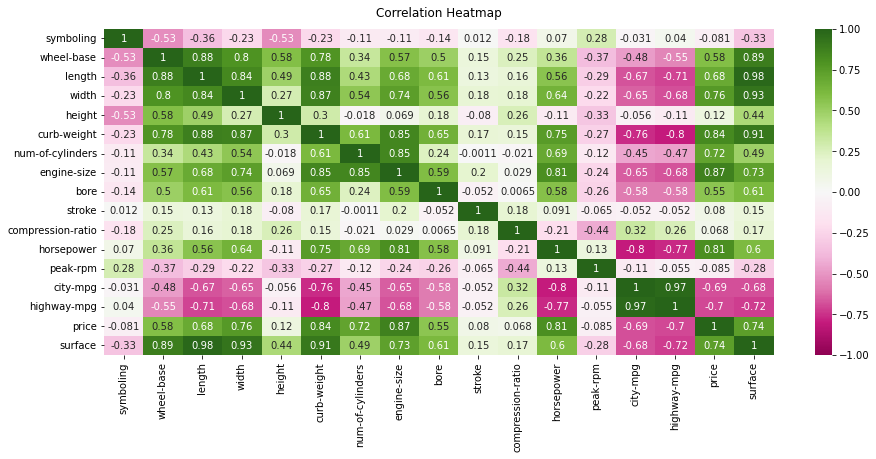

In [16]:
df_numerical = df_noloss().select_dtypes(['number'])
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(df_numerical.corr(), vmin=-1, vmax=1, annot=True,cmap='PiYG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From this correlation heatmap, we can see that symboling is not directly strongly linearly correlated to any of the feature. Off course, symboling is not a continuous value which partly explains lower correlation values by nature. There seems to be some inverse relation between symboling and the height (because sport cars are usually lower in height?),wheelbase (shorter wheelbase drives more 'sporty'?), and to a lower extinct an inversion relation with base surface of the car. Price and horsepower seems to have little correlation which is a bit surprising. Peak rpm also seems to be somewhat related.

In terms of dimensionality reduction:
* city-mpg and highway-mpg are highly correlated, so it would make sense to only keep highway-mpg
* there is a strong relation between length and width and between length and wheelbase, so length and width can be combined into surface (and drop length and width)
* compression ratio is somewhat inversely related to peak-rpm but for the rest the feature seems quite irrelevant

Furthermore we can see that
* curb weight and surface are closely related (a bigger car weighs more) 
* curb weight and engine size are related (a heavier car needs more power)
* the bigger the engine, the more horsepower
* the price seems to correlate with engine-size (and the features correlated to engine size off course) and inversely related to mpg

To be able to have a smaller pairplot, we will reduce the feature set by removing city-mpg and compression-ratio and by replacing length and width by surface.

We will also plot the Pearson correlation coefficent in the pairplot.

In [17]:
df_reduced = df_noloss().drop(labels=['city-mpg','compression-ratio','length','width','bore','stroke','num-of-cylinders'], axis=1)
df_reduced_numerical = df_reduced.select_dtypes(['number'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



<Figure size 1440x1440 with 0 Axes>

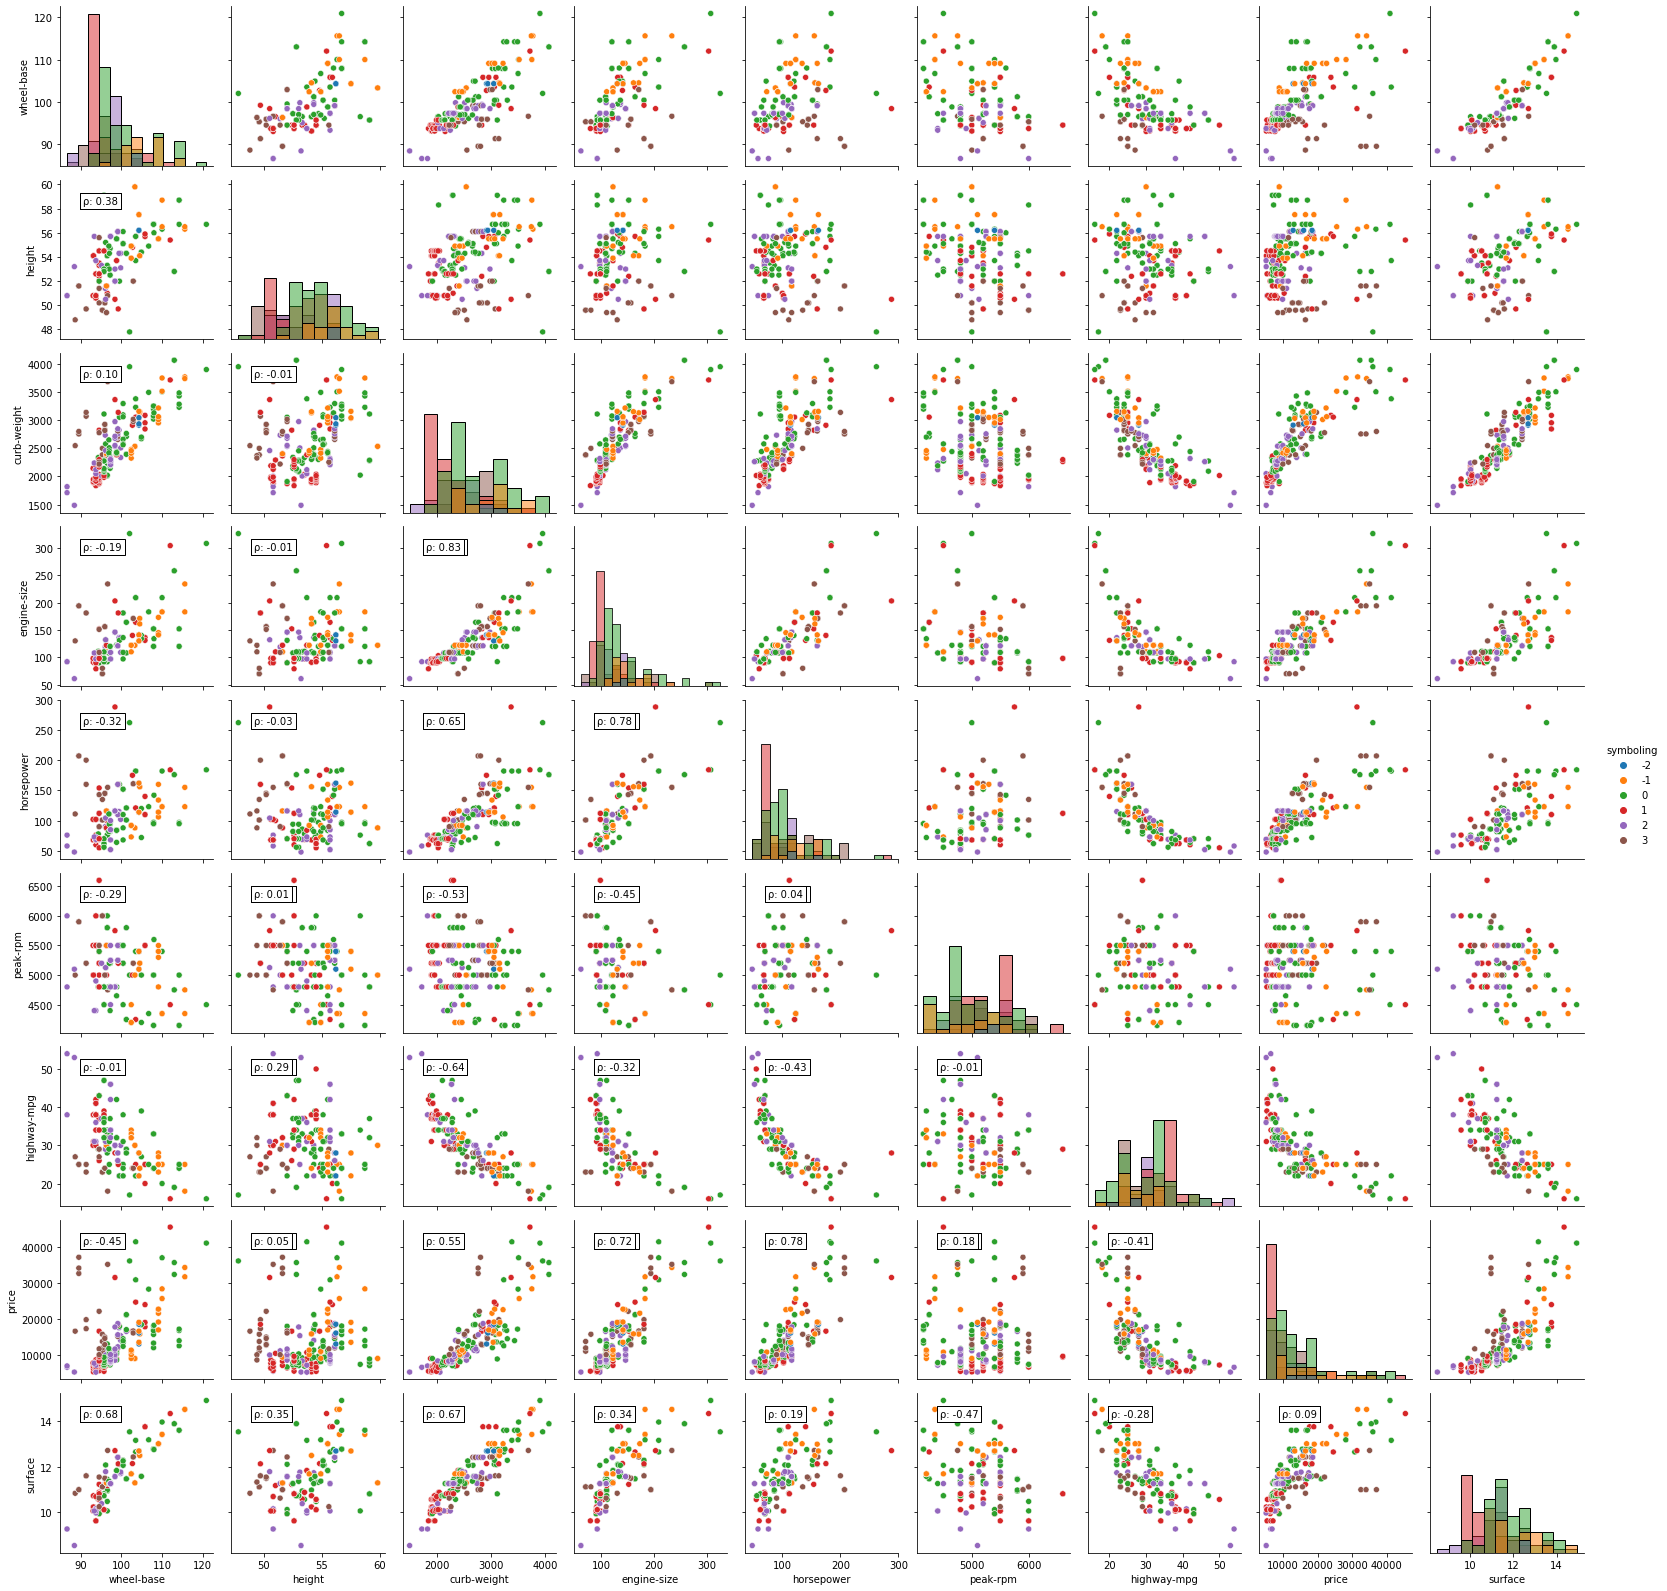

In [18]:

def plot_corr(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ: {r:.2f}', xy=(.15, .85), xycoords=ax.transAxes,bbox=dict(boxstyle="square",fc='white'))

plt.figure(figsize=(20,20))  

g = sns.pairplot(df_reduced_numerical, hue="symboling", diag_kind="hist", palette="tab10")
g.map_lower(plot_corr)

### Categorical data analysis

Let's also explore the categorical values, their distribution and relation towards symboling.

In [19]:
print('Number of unique values per categorical column')
for column in categorical_column_names:
    df[column] = df[column].astype('category')
    print(f'{column}: {len(df[column].unique())}')

Number of unique values per categorical column
symboling: 6
make: 22
fuel-type: 2
aspiration: 2
num-of-doors: 2
body-style: 5
drive-wheels: 3
engine-location: 2
engine-type: 7
fuel-system: 8


Make and to a lesser extent fuel-system, body-style and engine-type have a relatively high number of unique values. 
In order to keep the number of dimensions under control, we will use a binary encoder iso a onehotencoder.

In searching for relations between categorical and continuous variables, we discovered a package called Dython. It uses a different correlation metric depending on the data types of the feature with which we search for correlation.

In our case for
* numerical - numerical, we use pearsons correlation coefficient
* numerical - categorical, we use correlation ratio
* categorical - categorical, we use Cramer’s V or Theil’s U

These are the defaults of Dythons associations method.


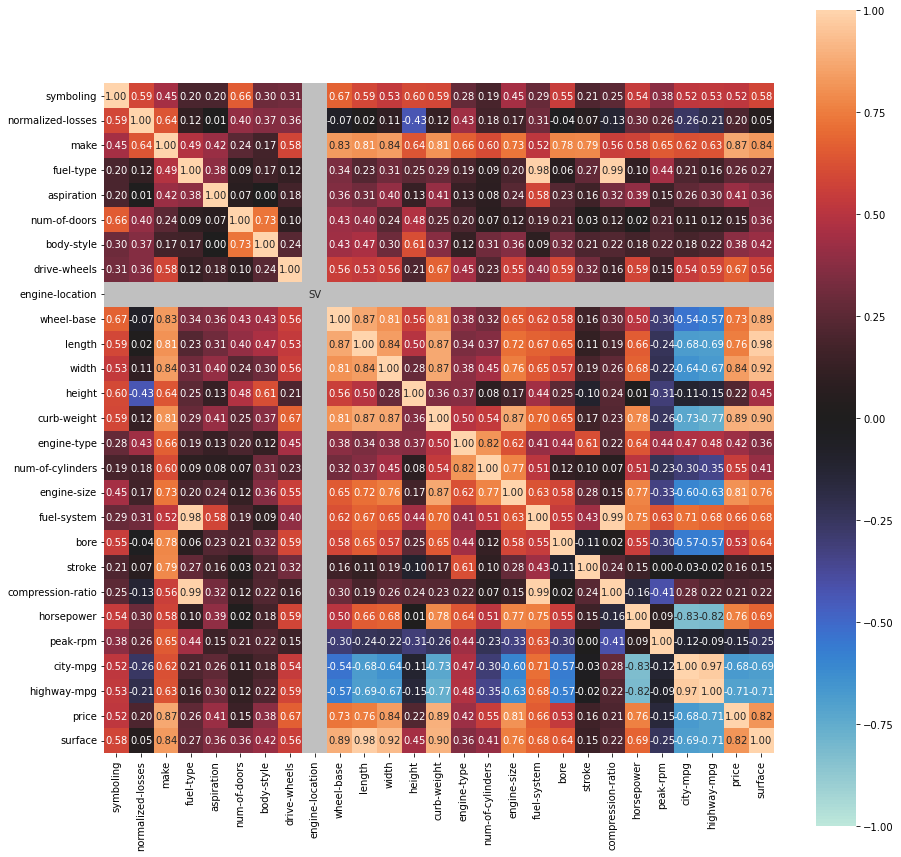

In [20]:
from dython.nominal import associations

df_without_nan = df.dropna()
complete_correlation= associations(df_without_nan, figsize=(15,15), nan_strategy=None)


For symboling we see moderate to high correlations with
* normalized losses
* make
* a bit surprisingly number of doors
* wheel base
* surface (and length and width naturally)
* height
* weight
* horse-power (and engine-size and bore)
* mpg 
* price

To impute the normalized losses, let's investigate the features with a moderate to high correlation
* make (high)
* symboling (high)
* height (moderate inverse)
* engine type (moderate)


In [21]:
symboling_distribution_by_make = df.groupby(['make','symboling'],as_index=False).size().sort_values(by=['make','symboling'])
symboling_distribution_by_make.plot(kind="bar", x='make',y='size',color='symboling',)

We can see clearly that the make has an influence on the symboling value. For example, Volvo has only -2 and -1. 
Porsche and Saab are high risk.

In [22]:
symboling_distribution_by_make.plot(kind="bar", x='symboling',y='size',color='make',color_discrete_sequence=px.colors.qualitative.Dark24)


Let's also have a look at the distribution of the remaining categorical features. We first print the distribution of the values per categorical feature (stacking the symboling values) and continue with the distribution of the symboling values (stacking the categorical values) 

In [23]:
symboling_values = df['symboling'].unique()

categorical_features =categorical_column_names[np.where((categorical_column_names != 'symboling') & (categorical_column_names != 'make'))]

from plotly.subplots import make_subplots
fig = make_subplots(rows=(len(categorical_features)//2),x_title="Distribution of categorical features",
                    cols=2, subplot_titles=categorical_features,horizontal_spacing=0.05,vertical_spacing=0.03)

fig2 = make_subplots(rows=(len(categorical_features)//2),x_title="Distribution of symboling over categorical features",
                    cols=2, subplot_titles=categorical_features,horizontal_spacing=0.05,vertical_spacing=0.03)

index = 0
for column in categorical_features:
    df_by = df.groupby([column,'symboling'],as_index=False).size().sort_values(by=[column,'symboling'])
    fig2.add_trace(go.Bar(x=df_by['symboling'],y=df_by['size']),row=(index//2) + 1, col=(index % 2) + 1)
    for v in symboling_values:
        df_by_symboling_value = df_by[df_by['symboling'] == v]
        if len(df_by_symboling_value) > 0:
            fig.add_trace(go.Bar(x=df_by_symboling_value[column],y=df_by_symboling_value['size'],name=f"s: {v}",marker_color=px.colors.qualitative.G10[v+2]),row=(index//2) + 1, col=(index % 2) + 1)
    index+=1

fig.update_layout(width=900, height=1200, showlegend=False, barmode='relative')  
fig.show()
fig2.update_layout(width=900, height=1200, showlegend=False, barmode='relative')  
fig2.show()
                   

We can make the following observations

We can see that the categorical features are not well distributed.

* Much more fuel type gas than diesel,symboling quite well distributed
* Much more aspiration std than turbo,symboling quite well distributed
* More equally distributed number of doors. Two door cars tend to have a higher risk factor
* Much more sedans than other cars. Hatchback, hardtop and convertible are clearly higher risk
* Most fwd wheel drive. fwd an rwd have similar symboling values
* Practically all cars have the engine located in the front, but the few that have it in the back are highest risk
* Engine type is most of the time ohc. The few rotor ones are highest risk
* Fuel system is most often mpfi. A few systems like 4bbl and mfi are always high risk.



## 1.3 Further data preparation, feature selection and model training
Let's start by splitting the data into a test and training set. We use stratification to have a representative distribution of the target classes in the train and test set.

In [24]:
y = df['symboling']
X = df.drop(labels=['symboling','normalized-losses','length','width','num-of-cylinders','bore','stroke','compression-ratio','city-mpg'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True, random_state=42,stratify=y)

In [25]:
X_train.head()

make fuel-type aspiration num-of-doors body-style drive-wheels  \
31           honda       gas        std          two  hatchback          fwd   
38           honda       gas        std         four      sedan          fwd   
196          volvo       gas        std         four      wagon          rwd   
148         subaru       gas      turbo         four      wagon          4wd   
66   mercedes-benz    diesel      turbo         four      sedan          rwd   

    engine-location  wheel-base  height  curb-weight engine-type  engine-size  \
31            front        93.7    52.6         1837         ohc           79   
38            front        96.5    54.1         2304         ohc          110   
196           front       104.3    57.5         3042         ohc          141   
148           front        96.9    54.9         2650        ohcf          108   
66            front       110.0    56.5         3515         ohc          183   

    fuel-system  horsepower  peak-rpm  highway-mpg    price   surface  
31         1bbl        60.0    5500.0           42   5399.0   9.60000  
38         1bbl        86.0    5800.0           33   8845.0  11.43608  
196        mpfi       114.0    5400.0           28  16515.0  12.68736  
148        mpfi       111.0    4800.0           23  11694.0  11.35344  
66          idi       123.0    4350.0           25  25552.0  13.42027

### Multinomial logistic regression (baseline)

We will create a pipeline for further imputation, scaling and encoding and we will use multinomial logistic regression as a simple baseline.

The preprocessing step consists of two parts:
* scaling of the numerical features
* encoding of the catgorical features

The classification step is the multinomial logistic regression.

In [26]:
preprocessing_pipeline = ColumnTransformer(transformers=[
           ('transform', StandardScaler(), X.select_dtypes(include=np.number).columns.values),
            ('encode', ce.BinaryEncoder(), X.select_dtypes(include='category').columns.values)
])

pipeline = Pipeline([
    ('pre', preprocessing_pipeline),
    ('cla', LogisticRegression(multi_class='multinomial',max_iter=1000))
])

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('transform', StandardScaler(),
                                                  array(['wheel-base', 'height', 'curb-weight', 'engine-size', 'horsepower',
       'peak-rpm', 'highway-mpg', 'price', 'surface'], dtype=object)),
                                                 ('encode', BinaryEncoder(),
                                                  array(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
      dtype=object))])),
                ('cla',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [28]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [29]:
sorted_symboling_values = symboling_values.sort_values()

## 1.4 Evaluation

Choosing a good evaluation method is extremely important. There are a few elements at play for choosing a good method.
* What kind of output is expected? => Here it is a multiclass classification
* To we have enough examples and are they balanced? => Here we have only a few samples and they are imbalanced
* What are we optimizing for: precision, recall? =>
This is mostly driven by the business goal. 
    * From an insurance risk perspective one might say, that we want a high recall for the more risky cars (2 or 3) so we do not wrongly predict lower symboling values for the high risk cars (to avoid having to pay out for damage more often)
    * From a commercial perspective, we want our insurance fee for the customer to be as low as possible in a concurrential market, so we want our precision to be high

As we are dealing with an imbalanced dataset, accuracy (alone) will not be a good evaluation metric. Business wise it is unclear for which we want to optimize, so we will choose a criterium that takes precision and recall into account. One possibility would be a weighted f1 score but probably better alternatives are Matthews correlation coefficient (MCC) and Cohen kappa score. Some justifications for taken mcc can be found on [Matthews corr coefficient](https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a) and for the [Kappa score](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c). They are good evaluation metrics when the dataset is imbalanced. 



We can interpret the kappa score as follows:
* <0 No agreement
* 0 — .20 Slight
* .21 — .40 Fair
* .41 — .60 Moderate
* .61 — .80 Substantial
* .81–1.0 Perfect

Possible MCC values range between -1 and 1
* close to 1 means that the predictions are good (high correlation between truth and prediction)
* close to 0 means that the predictions are bad (low to no correlation between truth and prediction)
* close to -1 means the opposite of the prediction is true (high negative correlation between truth and prediction)


In [30]:
#some evaluation visualisation functions
from ipywidgets import widgets, Layout
from IPython import display
import pandas as pd
import numpy as np

def evaluate(y_truth, y_test_pred, title_suffix =''):
    '''
    prints the classification report and return report and confusion matrix.

            Parameters:
                    y_test_pred (panda.Series): the vectorizer
                    
            Returns:
                    report: the classification report
                    cf_matrix: the confusion matrix
    '''
    # create output widgets
    widget1 = widgets.Output()
    widget2 = widgets.Output()

    # render in output widgets
    with widget1:
        report = classification_report(y_truth, y_test_pred,zero_division=0)
        print(f'Classification report {title_suffix}:\n',report)
        print('MCC: ', f'{matthews_corrcoef(y_truth, y_test_pred):.4f}\n')
        print('Cohen kappa score: ', f'{cohen_kappa_score(y_truth, y_test_pred):.4f}\n')
    with widget2:
        print(f'Confusion matrix')
        cf_matrix = confusion_matrix(y_truth, y_test_pred)
        plt.figure(figsize = (4,3))
        sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted_symboling_values, yticklabels=sorted_symboling_values)
        plt.xlabel('Predictions')
        plt.ylabel('Ground truth')
        plt.show()
    
    box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='auto'
                   )
    display.display(widgets.HBox([widget1, widget2], layout=box_layout))
    return classification_report(y_truth, y_test_pred,zero_division=0,output_dict=True)

def evaluate_best_params(grid_search:GridSearchCV, X_training:pd.DataFrame, X_testing:pd.DataFrame, y_training, y_testing):
    print(grid_search.best_params_)
    
    best_y_train_pred = grid_search.predict(X_training)
    evaluate(y_training, best_y_train_pred, 'TRAINING')

    best_y_test_pred = grid_search.predict(X_testing)
    evaluate(y_testing, best_y_test_pred, 'TEST')


def show_grid_results(gridSearch:GridSearchCV):
    grid_temp= pd.DataFrame(gridSearch.cv_results_)[['param_cla',
                                'param_pre__transform',
                                'mean_test_mcc',
                               'std_test_mcc',
                               ]]
    grid_temp['key']= grid_temp.apply(lambda x: f"{str(x['param_cla']).partition('(')[0]}-{str(x['param_pre__transform']).partition('(')[0]}", axis=1)
    grid_temp.set_index('key', inplace=True)
    grid_result = grid_temp[[  'mean_test_mcc',
    #                             'mean_test_accuracy',
    #                             'mean_test_precision',
    #                             'mean_test_recall',
    #                             'mean_test_f1',
                               ]].transpose()
    #gs.cv_results_
#     fig = px.bar(data_frame=grid_result,
#                 y=grid_result.columns, barmode='group', text_auto=".3f")
    
#     fig.show()
    fig2 = px.scatter(grid_temp, x=grid_temp.index, y="mean_test_mcc", color=grid_temp.index,
                      error_y="std_test_mcc")
    fig2.update_layout(
        autosize=False,
        width=900,
        height=800,)
    fig2.show()
    

In [31]:
evaluate(y_train, y_train_pred,'Logistic Regression TRAIN')
result = evaluate(y_test, y_test_pred,'Logistic Regression TEST')

We can see that the prediction has a relatively low value for MCC and kappa score and there's quite a difference between the train and test set.

### Exploration of models
We will now explore other classifiers and preprocessing steps to look for promising combinations. 
After that, we will tune the most promising ones to see if results further improve.

We will use grid search CV for that with a five fold cross validation. We will calculate different scoring values for evaluation and optimize for mcc.


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier

In [33]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro'),
           'mcc': make_scorer(matthews_corrcoef),
              }
params = [
    { 'pre__transform': [MinMaxScaler(),StandardScaler(),RobustScaler(),PowerTransformer(method="yeo-johnson"),QuantileTransformer(output_distribution="normal")],
        'cla':[LogisticRegression(multi_class='multinomial',max_iter=1000), 
               DecisionTreeClassifier(max_depth=10, random_state=0),
              GaussianNB(),
              RandomForestClassifier(max_depth=15, random_state=0),
              RidgeClassifier(),
              LinearSVC(multi_class="crammer_singer"),
              NearestCentroid()]
    },
    { 'pre__transform': [MinMaxScaler()],
        'cla':[ MultinomialNB()]
    }
]

gs = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1, cv=5, scoring=scoring, refit="mcc")

In [34]:
_ = gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



The warning is about the fact that we only have to samples in the -2 symboling class.

In [35]:
show_grid_results(gs)

In [36]:
evaluate_best_params(gs, X_train, X_test, y_train, y_test)

{'cla': DecisionTreeClassifier(max_depth=10, random_state=0), 'pre__transform': PowerTransformer()}


Decision tree currently scores best.We also see that the standard deviation is quite substantial for decision tree. We will look at the most important features to scale down the feature set by selecting only the most relevant features. Not all classifiers have this most important features property but it is a good start if you want to reduce dimensionality. 


In [37]:
feature_importances = list(zip(X_train.columns,gs.best_estimator_.named_steps["cla"].feature_importances_))
feature_importances.sort(key=lambda x: x[1],reverse=True)
feature_importances

[('make', 0.3366706549217464),
 ('fuel-type', 0.14116655574795747),
 ('num-of-doors', 0.09311634696530802),
 ('height', 0.08842440630867518),
 ('engine-type', 0.07525998959295038),
 ('aspiration', 0.05869502088966998),
 ('body-style', 0.04840700529921157),
 ('drive-wheels', 0.025694713713325584),
 ('engine-size', 0.025490787414013467),
 ('engine-location', 0.004449301075900535),
 ('surface', 0.003058894489681616),
 ('wheel-base', 0.0),
 ('curb-weight', 0.0),
 ('fuel-system', 0.0),
 ('horsepower', 0.0),
 ('peak-rpm', 0.0),
 ('highway-mpg', 0.0),
 ('price', 0.0)]

We can see that make is an important feature but there are quite a few other important ones. 

What is a bit surprising is the low importance of surface (It scored relatively high for correlation with symboling previously)

### Model selection including normalized losses
Let's see if we can get better results when including the normalized-loss. For the imputation strategy, we investigateif we can do better than just taking a mean for the na values.

In [38]:
fig = make_subplots(rows=5, cols=1,vertical_spacing=0.08)
fig.add_trace(go.Box(name="make",x=df["make"], y=df["normalized-losses"]),row=1, col=1)
fig.add_trace(go.Scatter(name="price",x=df["price"], y=df["normalized-losses"],mode='markers'),row=2, col=1)
fig.add_trace(go.Box(name="body-style",x=df["body-style"], y=df["normalized-losses"]),row=3, col=1)
fig.add_trace(go.Scatter(name="surface",x=df["surface"], y=df["normalized-losses"],mode='markers'),row=4, col=1)
fig.add_trace(go.Scatter(name="horsepower",x=df["horsepower"], y=df["normalized-losses"],mode='markers'),row=5, col=1)

fig.update_xaxes(title_text="price", row=2, col=1)
fig.update_xaxes(title_text="surface", row=4, col=1)
fig.update_xaxes(title_text="horsepower", row=5, col=1)

fig.update_layout(height=1400, width=800, title_text="Relation of normalized losses with ...")
fig.show()

We do see that we can have a more fine grained imputation for normalized losses if we take the median of the make (median because of a few outliers for some makes). Make was also the most correlated feature to normalized losses.
Other options would be to develop a separate ML algorithm to impute but we will not go that road.


In [39]:
loss_by_make = df.dropna(axis=0).groupby(['make']).median()['normalized-losses']
mean_loss_by_make = loss_by_make.mean()
loss_by_make.fillna(mean_loss_by_make, inplace=True)
df.loc[:,'normalized-losses'] = df.apply(lambda x: loss_by_make[x.make] if np.isnan(x['normalized-losses']) > 0 else x['normalized-losses'], axis=1)


Recreate the train and test set including normalized losses and rerun our gridsearch on it.

In [40]:
X_nl = df.drop(labels=['symboling','length','width','num-of-cylinders','bore','stroke','compression-ratio','city-mpg'], axis=1)
X_nl_train, X_nl_test, y_nl_train, y_nl_test = train_test_split(X_nl, y, test_size=0.3, shuffle= True, random_state=42,stratify=y)

In [41]:
preprocessing_pipeline_nl = ColumnTransformer(transformers=[
           ('transform', StandardScaler(), X_nl.select_dtypes(include=np.number).columns.values),
            ('encode', ce.BinaryEncoder(), X_nl.select_dtypes(include='category').columns.values)
])

pipeline_nl = Pipeline([
    ('pre', preprocessing_pipeline_nl),
    ('cla', LogisticRegression(multi_class='multinomial',max_iter=1000))
])

gs_nl = GridSearchCV(pipeline_nl, params, n_jobs=-1, verbose=1, cv=5, scoring=scoring, refit="mcc")
_= gs_nl.fit(X_nl_train, y_nl_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



In [42]:
gs_nl.estimator

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('transform', StandardScaler(),
                                                  array(['normalized-losses', 'wheel-base', 'height', 'curb-weight',
       'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg', 'price',
       'surface'], dtype=object)),
                                                 ('encode', BinaryEncoder(),
                                                  array(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
      dtype=object))])),
                ('cla',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [43]:
show_grid_results(gs_nl)
evaluate_best_params(gs_nl, X_nl_train, X_nl_test, y_nl_train, y_nl_test)

{'cla': RandomForestClassifier(max_depth=15, random_state=0), 'pre__transform': PowerTransformer()}


We can see that the RandomForest classifier with QuantileTransformer performs best (scaling is not so important for random forest).

We score higher than without normalized losses.

We will also tune the parameters and try and ensemble classifier to see if we can further increase the performance of our algorithm. We will keep the 4 most promising algorithms and see if we can still improve.

In [44]:
feature_importances = list(zip(X_nl_train.columns,gs_nl.best_estimator_.named_steps["cla"].feature_importances_))
feature_importances.sort(key=lambda x: x[1],reverse=True)
feature_importances

[('make', 0.12831985390019113),
 ('normalized-losses', 0.1001676485604181),
 ('height', 0.09505327848197155),
 ('aspiration', 0.0813781909330256),
 ('fuel-type', 0.07563967302844571),
 ('num-of-doors', 0.06065321589943309),
 ('body-style', 0.058266700140903384),
 ('drive-wheels', 0.05361179462332274),
 ('engine-location', 0.05125981610633066),
 ('engine-type', 0.023796487743636546),
 ('engine-size', 0.015027177296686442),
 ('fuel-system', 0.012584392515105666),
 ('surface', 0.012047926874291981),
 ('horsepower', 0.012045784602865284),
 ('price', 0.008939742117001348),
 ('curb-weight', 0.00754406078326344),
 ('highway-mpg', 0.002525702921433294),
 ('peak-rpm', 0.002064969296255764),
 ('wheel-base', 0.0)]

The make and normalized losses are the most important feature for the random forest. For the rest we see that the order of importance slightly shifts.


In [45]:
refine_params = [
     {
        'pre__transform': (QuantileTransformer(),),
        'cla': (LogisticRegression(C=2.262275303806046, penalty='l1', solver='liblinear'),),
#         'cla__penalty' : ['l1', 'l2'],
#         'cla__C' : np.logspace(0.1, 1,num=100,endpoint=True),
#         'cla__solver' : ['liblinear']
    },
    {
        'pre__transform': (MinMaxScaler(),),
        'cla': (RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1200,random_state=0),),
#         'cla__bootstrap': [True, False],
#         'cla__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#         'cla__max_features': ['auto', 'sqrt'],
#         'cla__min_samples_leaf': [1, 2, 4],
#         'cla__min_samples_split': [2, 5, 10],
#         'cla__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    {
        'pre__transform': (PowerTransformer(method="yeo-johnson"),),
        'cla': (LinearSVC(C=22.857142857142858, loss='hinge', max_iter=5000,
          multi_class='crammer_singer', penalty='l1'),),
#         'cla__C': np.linspace(10, 100,num=50,endpoint=True), 
#         'cla__penalty': ['l1', 'l2'],
#         'cla__loss': ['hinge', 'squared_hinge'],
#         'cla__multi_class': ['ovr', 'crammer_singer'],
    },
    {
       'pre__transform': (QuantileTransformer(),), 
        'cla': (RidgeClassifier(alpha=3.1622776601683795, solver='sparse_cg'),),
#         'cla__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
#         'cla__alpha': np.logspace(-1, 2,num=15,endpoint=True),
        
    },
]
refine_gs = GridSearchCV(pipeline_nl, refine_params, n_jobs=-1, verbose=1, cv=3, scoring=scoring, refit="mcc")
_ = refine_gs.fit(X_nl_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.



In [46]:
show_grid_results(refine_gs)

evaluate_best_params(refine_gs, X_nl_train, X_nl_test, y_nl_train, y_nl_test)

{'cla': RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1200, random_state=0), 'pre__transform': MinMaxScaler()}


Hyperparameter tuning gives a slight improvement in MCC or Cohen kappa score. Let's try with combining these algorithms in an ensemble classifier. 

In [47]:
from sklearn.ensemble import VotingClassifier
estimators =[
    ('lg', LogisticRegression(C=2.262275303806046, penalty='l1', solver='liblinear')),
    ('rf', RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=1200,random_state=0)),
     ('svc', LinearSVC(C=22.857142857142858, max_iter=5000, multi_class='ovr')),
    ('ri', RidgeClassifier(alpha=3.1622776601683795, solver='sparse_cg'))
]

for e in estimators:
    pipe = Pipeline([
    ('pre', preprocessing_pipeline_nl),
    ('cla', e[1])
    ])
    pipe.fit(X_nl_train,y_nl_train)
    evaluate(y_test, pipe.predict(X_nl_test),f'{e[0]} on TEST set')

voting_pipe = Pipeline([
    ('pre', preprocessing_pipeline_nl),
    ('cla', VotingClassifier(estimators=estimators,voting="hard", weights=[1,2,1,1]))
    ])
voting_pipe.fit(X_nl_train,y_nl_train)
_ = evaluate(y_nl_test, voting_pipe.predict(X_nl_test),f'VOTING on TEST set')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



We use the previous classifiers in a voting classifier. We choose hard voting (by counting) because not every classifier implements the predict_proba. We do assign more weight to the best classifier. 

The result is not better than the result of the random forest alone.

We can also use more advanced ensemble methods based on boosting. Within the scikit learn package we could use GradientBoostingClassifier. A few other popular boosting algorithms packages are XGBoost, LightGBM and CatBoost.

We will try with CatBoost.


The following methods are helpers for the to_categorical method of keras.utils.

This method only works with positive values so our target labels must be shifted to the right (starting from 0 iso -2).


In [48]:
def shift_labels_to_positive(x):
    int_labels = x.astype(int)
    return int_labels - int_labels.min()
def shift_predictions_to_category(pred,y_original):
    int_labels = y_original.astype(int)
    return pred + int_labels.min()

In [49]:
# pip install catboost
from catboost import Pool, CatBoostClassifier
from tensorflow.keras.utils import normalize, to_categorical
y_nl_train_pos =y_nl_train.astype(int)
y_cb_train = y_nl_train_pos - y_nl_train_pos.min()
class_weights = y_nl_train_pos.value_counts().sort_index().values / len(y_nl_train_pos)
model_cb = CatBoostClassifier(iterations=200,
                           learning_rate=0.25,
                           depth=10,
                           verbose=0,
                           loss_function='MultiClass',
                           classes_count=6,
                           class_weights=class_weights,
                          cat_features=X_nl_train.select_dtypes(include='category').columns.values)
model_cb.fit(X_nl_train,y_cb_train)
y_cat_test_pred = model_cb.predict(X_nl_test)
y_cat_test_pred=y_cat_test_pred + y_nl_train_pos.min()
_ = evaluate(y_nl_test, y_cat_test_pred,f'CatBoost on TEST set')

The accuracy, mcc and kappa score for catboost are better than the voting classifier and that is totally expected.

### Neural network
Let's see how a neural network performs.

We have 6 target classes so we will also model 6 nodes in the output layer.
After the encoding of the categorical features, we have 35 features so we will have 35 nodes in the input layer.
We will start off slow with 70 nodes in the hidden layer.

For a multiclass classification we will use a softmax activation function.

Later on we will refine the layers/nodes/parameters of the neural network.

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import normalize, to_categorical
import tensorflow_addons as tfa
# pip install tensorflow_addons

It is best to scale the numerical features and encode the categorical ones. We use the binary encoder again for the categorical features.

In [51]:
def normalize_and_encode_x(Xtrain, Xtest):
    number_cols = Xtrain.select_dtypes(include=np.number).columns
    original_cat_cols = Xtrain.select_dtypes(include='category').columns
    
    XX_train = Xtrain.copy(deep=True)
    scaler = StandardScaler()
    encoder  =ce.BinaryEncoder()
    XX_train[number_cols] = scaler.fit_transform(Xtrain[number_cols])
    cat_df =  encoder.fit_transform(Xtrain[original_cat_cols])
    
    XX_train.drop(labels=original_cat_cols,axis=1, inplace=True)
    XX_train[cat_df.columns] = cat_df
    
    XX_test = Xtest.copy(deep=True)
    XX_test[number_cols] = scaler.transform(Xtest[number_cols])
    cat_df_test =  encoder.transform(Xtest[original_cat_cols])
    
    XX_test.drop(labels=original_cat_cols,axis=1, inplace=True)
    XX_test[cat_df_test.columns] = cat_df_test
    return (XX_train,XX_test)

# preprocessing_pipeline = ColumnTransformer(transformers=[
#            ('transform', StandardScaler(), X.select_dtypes(include=np.number).columns.values),
#             ('encode', ce.BinaryEncoder(), X.select_dtypes(include='category').columns.values)
# ])

We split up the training set into a train and validation set. The validation set is used after every epoch to see if the nn improves on untrained data.

The labels are one hot encoded using the utility method to_categorical from keras.utils

In [52]:
(X_nn, X_nn_test )= normalize_and_encode_x(X_nl_train, X_nl_test)
X_nn_train, X_nn_valid = X_nn[:140], X_nn[140:]


y_nl_train_pos =y_nl_train.astype(int)
y_nn = to_categorical(shift_labels_to_positive(y_nl_train), 6)
y_nn_train, y_nn_valid = y_nn[:140], y_nn[140:]

y_nn_shifted_train,y_nn_shifted_valid = shift_labels_to_positive(y_nl_train)[:140],shift_labels_to_positive(y_nl_train)[140:]

In [53]:
model_nn = keras.models.Sequential([
    keras.layers.Dense(70, activation="relu",input_shape=(35,)),
    keras.layers.Dense(6, activation="softmax")
])

model_nn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tfa.metrics.MatthewsCorrelationCoefficient(name='mcc', num_classes=6)])
history = model_nn.fit(x=X_nn_train,y=y_nn_train, epochs=30,validation_data=(X_nn_valid,y_nn_valid))



Epoch 1/30
1/5 [=====>........................] - ETA: 6s - loss: 1.9241 - mcc: -0.1629

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:254: UserWarning:

Metric MatthewsCorrelationCoefficient implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.



5/5 [==============================] - 2s 117ms/step - loss: 1.9377 - mcc: 0.0640 - val_loss: 2.1047 - val_mcc: 0.0000e+00
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 1.7714 - mcc: 0.1905 - val_loss: 1.9639 - val_mcc: 0.0000e+00
Epoch 3/30
5/5 [==============================] - 0s 12ms/step - loss: 1.6368 - mcc: 0.2283 - val_loss: 1.8619 - val_mcc: -0.5000
Epoch 4/30
5/5 [==============================] - 0s 12ms/step - loss: 1.5386 - mcc: 0.2919 - val_loss: 1.7787 - val_mcc: -0.5000
Epoch 5/30
5/5 [==============================] - 0s 12ms/step - loss: 1.4586 - mcc: 0.3618 - val_loss: 1.7158 - val_mcc: 0.0000e+00
Epoch 6/30
5/5 [==============================] - 0s 13ms/step - loss: 1.3888 - mcc: 0.3516 - val_loss: 1.7037 - val_mcc: 0.0000e+00
Epoch 7/30
5/5 [==============================] - 0s 15ms/step - loss: 1.3321 - mcc: 0.3622 - val_loss: 1.7034 - val_mcc: 0.0000e+00
Epoch 8/30
5/5 [==============================] - 0s 14ms/step - loss: 1.2816 - mcc: 

Below, we show the performance (mcc and loss) evolution with respect to the number of epochs. If the loss of the validation set starts to increase, that is an indication that we are starting to overfit. Off course we can have local optima so we will have to look for an increasing trend but the technique of early stopping is partially based on this.
We will introduce early stopping in the refinement phase.

In [54]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(kind="line",labels={'index':"Epochs"})

In [55]:
y_nn_train_pred=model_nn.predict(X_nn_train) 
y_nn_train_pred=np.argmax(y_nn_train_pred, axis=1)+y_nl_train_pos.min()
_=evaluate(np.argmax(y_nn_train, axis=1)+y_nl_train_pos.min(), y_nn_train_pred,'NN TRAIN')



In [56]:
y_nn_test_pred =model_nn.predict(X_nn_test)

y_nn_test_pred=np.argmax(y_nn_test_pred, axis=1) - 2

_= evaluate(y_nl_test, y_nn_test_pred,'NN TEST')

The performance of this nn is not soo bad but we will try some more refinement.
We also introduce early stopping on loss of validation. We have a patience of 10 which means that we will only stop after 10 times of non reduction of the loss on the validation set.

In [57]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
scoring_nn = {
            'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro'),
           'mcc': make_scorer(matthews_corrcoef),
           
              }
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
def create_nn(dense_layer_sizes=[], optimizer="adam", dropout=0.1, init='uniform', nbr_features=35, dense_nparams=200):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(dense_nparams, activation='relu', input_shape=(nbr_features,))) 
    model.add(keras.layers.Dropout(dropout), )
    for layer_size in dense_layer_sizes:
        model.add(keras.layers.Dense(layer_size, activation='relu'))
        model.add(keras.layers.Dropout(dropout), )
    model.add(keras.layers.Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_nn,  verbose=1, epochs=50,validation_data=(X_nn_valid,y_nn_shifted_valid),callbacks=[es])
params_nn ={
    'epochs' : [50,100],
    'dense_layer_sizes': [[],[200]],
    'batch_size' : [10,20]
}
gs_nn = GridSearchCV(estimator, params_nn, n_jobs=-1, verbose=1, cv=3, scoring=scoring_nn, refit="mcc")


In [ ]:
_ = gs_nn.fit(X_nn_train,y_nn_shifted_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
def strip_dict_chars(s):
    return s.replace('{','').replace('}','').replace(':','_').replace("'","").replace("[]","none").replace(' ','')
grid_temp= pd.DataFrame(gs_nn.cv_results_)[['params',
                                'mean_test_mcc',
                                 'mean_test_accuracy',
                                            'std_test_mcc',
                                 'std_test_accuracy',
                               ]]
grid_temp['key']= grid_temp.apply(lambda x: f"{strip_dict_chars(str(x['params']))}", axis=1)
grid_temp.set_index('key', inplace=True)

fig = px.scatter(grid_temp, x=grid_temp.index, y="mean_test_mcc", color=grid_temp.index,
                  error_y="std_test_mcc")
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.show()
print(gs_nn.best_params_)
best_y_nn_test_pred = gs_nn.predict(X_nn_test)
_= evaluate(y_nl_test, shift_predictions_to_category(best_y_nn_test_pred,y_nl_test), 'TEST')

We achieve an accuracy of almost 80% and also the highest score for MCC and kappa score with a neural network with 
* batch size = 10
* one hidden layer of 200 nodes and one dropout layer
* number of epochs was 50 but it stopped early

There are still a lot more parameters that can be explored like the number of layers, nodes in a layer, different activation functions and optimizers.

Although this neural network gives slightly better results then the random forest classifier, we would be tempted to choose the randon forest over the neural network also due to the accessibility of feature importances.